<a href="https://colab.research.google.com/github/leejunho12316/Machine-Learning/blob/main/%EB%8B%A8%EC%9D%BC%EC%9E%85%EB%A0%A5_BERT_%EC%97%B0%EC%8A%B5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Setup - Download Package & Import**

https://bo-10000.tistory.com/167

#tensorflow-text, AdamW optimizer
#!pip install tensorflow-text

In [ ]:
pip install -U "tensorflow-text==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Un

In [ ]:
pip install "tf-models-official==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 23.7 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=6f6809c5a31896a43db3c6f1ceefbaaa09df3e39c6173352238c7c26c651f664
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization #tf models official 에 있는 optimization 모델

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

## **Prepare Data**

**Download**
1. aclImdb gz 파일 다운로드
2. 폴더 생성
aclImdb
  ㄴ train
    ㄴ unsup


In [ ]:
#자동으로 aclimdb 데이터셋이 다운되고 자동으로 압축해제됨
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

dataset = tf.keras.utils.get_file('aclImdb_v1.tar.gz', url,
                                  untar=True, cache_dir='.',
                                  cache_subdir='')

#데이터 path 지정
dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')
train_dir = os.path.join(dataset_dir, 'train')
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir) #remove tree - 디렉토리 삭제



84125825/84125825 [==============================] - 6s 0us/step


In [ ]:
print('dataset directory : ' + dataset_dir)
print('train directory   : ' + train_dir)
print('remove directory  : ' + remove_dir)

a = '/content/aclImdb/train/neg'
b = '/content/aclImdb/train/pos'
c = '/content/aclImdb/test/neg'
d = '/content/aclImdb/test/pos'

list_a = os.listdir(a)
list_b = os.listdir(b)
list_c = os.listdir(c)
list_d = os.listdir(d)

print(f"train negative volume :{len(list_a)}")
print(f"train positive volume :{len(list_b)}")
print(f"test negative volume :{len(list_c)}")
print(f"test positive volume :{len(list_d)}")

#1250개씩만 사용합시다
for file in list_a[1250:]:
  path = os.path.join(a,file)
  if os.path.exists(path):
    os.remove(path)
  else:
    print("no path")

#1250개씩만 사용합시다
for file in list_b[1250:]:
  path = os.path.join(b,file)
  if os.path.exists(path):
    os.remove(path)
  else:
    print("no path")

#1250개씩만 사용합시다
for file in list_c[1250:]:
  path = os.path.join(c,file)
  if os.path.exists(path):
    os.remove(path)
  else:
    print("no path")

#1250개씩만 사용합시다
for file in list_d[1250:]:
  path = os.path.join(d,file)
  if os.path.exists(path):
    os.remove(path)
  else:
    print("no path")


dataset directory : ./aclImdb
train directory   : ./aclImdb/train
remove directory  : ./aclImdb/train/unsup
train negative volume :12500
train positive volume :12500
test negative volume :12500
test positive volume :12500


In [ ]:

print(f"train negative volume :{len(list_a)}")
print(f"train positive volume :{len(list_b)}")
print(f"test negative volume :{len(list_c)}")
print(f"test positive volume :{len(list_d)}")

train negative volume :1250
train positive volume :1250
test negative volume :1250
test positive volume :1250


prepare dataset, train-val split

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

#train dataset
###text_dataset_from_directory 를 사용해서 aclImdb/train의 데이터를 로드함. 20%는 validation, 80%는 training 에 쓰고 한 번에 얼마나 학습할 것인지 결정하는 batch size는 32로, 일관된 작업을 위해서 seed를 설정해줌.
raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

#validation dataset
#? validation 데이터셋에 왜 validaton split을 또 해주는지 : 위에서 train dataset을 만들고 남은 20%를 사용하겠다는 의미이다. subset의 값은 training, validation 두 개로 정해져있고 validation으로 지정할 경우 이렇게 쓰는것이다.
val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

#test dataset
#? seed랑 subset 설정 왜 안함? : subset을 안해준 이유는 test데이터는 test데이터이기 때문에, seed는 테스트 데이터에서는 일관되게 처리하는게 딱히 중요하지 않기 때문
test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test',
    batch_size=batch_size)

#데이터셋을 메모리에 캐시함.(그냥 로딩 효율 높히기)
#buffer_size AUTOTUNE : Tensorflow의 기능. 모델이 학습하는 동안 다음 배치를 미리 준비함.
train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

#raw_train_ds 데이터셋에서 클래스 이름 추출하기 (폴더 이름을 기반으로 함)
#이 경우엔 neg, pos
class_names = raw_train_ds.class_names


Found 2500 files belonging to 2 classes.
Using 2000 files for training.
Found 2500 files belonging to 2 classes.
Using 500 files for validation.
Found 2500 files belonging to 2 classes.


Data Check

In [ ]:
for text_batch, label_batch in train_ds.take(1):
  for i in range(3):
    print(f'Review: {text_batch.numpy()[i]}')
    label = label_batch.numpy()[i]
    print(f'Label : {label} ({class_names[label]})')

Review: b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label : 0 (neg)
Review: b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they

### **Pretrained Model -> BERT 모델 -> Dropout-Dense Layer -> Classifier Layer**

Proprocessing model : 텍스트 데이터를 모델이 이해할 수 있는 형태로 변환
 텍스트 데이터 토큰화, 정수 인코딩, 패딩
  ㄴ 정수 인코딩 (integer encoding) : 어휘사전에 맞춰서 인코딩
  ㄴ 패딩 (padding) : 시퀀스 길이 일치시키기

BERT model : 텍스트 토큰을 받아 임베딩 생성
pretrained 된 모델을 사용하며 미세조정 가능
  ㄴ 임베딩 : 텍스트의 의미적, 문맥적 특성

Dropout-Dense Layer : 모델의 과적합(overfitting) 방지
BERT 모델리 만든 임베딩을 특정 작업에 맞는 출력으로 변환 - 분류, 예측
   ㄴDropout : 학습 과정에서 일부 뉴런을 임의로 비활성화하는 방식으로 특정 뉴런에만 의존하지 않도록 하는 것

Classifier Layer : 분류레이어




Preprocessing 모델 선언, 테스트

In [ ]:
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'

In [ ]:
#Pretrained Model
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
original_text = ['A B C D \nB']
tokenized_text = bert_preprocess_model(original_text)

print(tokenized_text.keys()) #볼 수있는 키들 : input_mask, input_word_ids, input_type_ids
#->
print(tokenized_text['input_word_ids']) #각 token의 id
print(tokenized_text['input_mask']) #패딩에서 0 나머지에서 1
print(tokenized_text['input_type_ids']) #문장 구별 id

dict_keys(['input_mask', 'input_word_ids', 'input_type_ids'])
tf.Tensor(
[[ 101 1037 1038 1039 1040 1038  102    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]], shape=(1, 128), dtype=int32)
tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  

BERT 모델 선언, 테스트

In [ ]:
#BERT 모델 : bert_model
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
bert_results = bert_model(tokenized_text)

print(tfhub_handle_encoder)
print(bert_results.keys()) #키
#->
#sequence_output : 각 token의 embedding
print(bert_results['sequence_output'].shape)
print(bert_results['sequence_output'])

#pooled output : 전체 문장의 embedding
print(bert_results['pooled_output'].shape)
print(bert_results['pooled_output'])



Dropout, Classifier 추가한 **총합 모델 생성**

In [ ]:
#Enrie Model - pretrained & BERT 에 dropout과 classifier을 더해 전체 모델 선언
def build_classifier_model():
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder') #trainable - 학습 중에 모델 조정 가능
  #과적합 방지 위한 dropout Layer
  #? 인수는 무엇을 위한 값인가? : dropout rate 지정
  dropout = tf.keras.layers.Dropout(0.1)
  #최종 출력을 위한 분류기 Layer
  classifier = tf.keras.layers.Dense(1, activation=None, name='classifier')

  #text 입력해 preprocessing, encoding 거침 -> 나중에 모델을 불러오기 했을 때 text 를 prediction() 메소드에 입력해주어야 함. 형식 : text = ['문자열']
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  encoder_inputs = preprocessing_layer(text_input)
  outputs = encoder(encoder_inputs)

  #encoding 결과물의 pooled_output을 dropout, classifier 적용
  net = outputs['pooled_output']
  net = dropout(net)
  net = classifier(net)

  #입력값, 결과값 keras Model로 반환
  return tf.keras.Model(text_input, net)

In [ ]:
#text를 tf.constant로 tensor 형태로 변환한 후 전체 모델을 통해 통과시킨 결과를 sigmoid 함수로 확률값으로 나타낸다
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(['아주 좋아요 이거']))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.31420454]], shape=(1, 1), dtype=float32)


In [ ]:
text1 = [r"Brilliant over-acting by Lesley Ann Warren. Best dramatic hobo lady I have ever seen, and love scenes in clothes warehouse are second to none. The corn on face is a classic, as good as anything in Blazing Saddles. The take on lawyers is also superb. After being accused of being a turncoat, selling out his boss, and being dishonest the lawyer of Pepto Bolt shrugs indifferently 'I'm a lawyer' he says. Three funny words. Jeffrey Tambor, a favorite from the later Larry Sanders show, is fantastic here too as a mad millionaire who wants to crush the ghetto. His character is more malevolent than usual. The hospital scene, and the scene where the homeless invade a demolition site, are all-time classics. Look for the legs scene and the two big diggers fighting (one bleeds). This movie gets better each time I see it (which is quite often)."]
text2 = [r"Airport '77 starts as a brand new luxury 747 plane is loaded up with valuable paintings & such belonging to rich businessman Philip Stevens (James Stewart) who is flying them & a bunch of VIP's to his estate in preparation of it being opened to the public as a museum, also on board is Stevens daughter Julie (Kathleen Quinlan) & her son. The luxury jetliner takes off as planned but mid-air the plane is hi-jacked by the co-pilot Chambers (Robert Foxworth) & his two accomplice's Banker (Monte Markham) & Wilson (Michael Pataki) who knock the passengers & crew out with sleeping gas, they plan to steal the valuable cargo & land on a disused plane strip on an isolated island but while making his descent Chambers almost hits an oil rig in the Ocean & loses control of the plane sending it crashing into the sea where it sinks to the bottom right bang in the middle of the Bermuda Triangle. With air in short supply, water leaking in & having flown over 200 miles off course the problems mount for the survivor's as they await help with time fast running out...<br /><br />Also known under the slightly different tile Airport 1977 this second sequel to the smash-hit disaster thriller Airport (1970) was directed by Jerry Jameson & while once again like it's predecessors I can't say Airport '77 is any sort of forgotten classic it is entertaining although not necessarily for the right reasons. Out of the three Airport films I have seen so far I actually liked this one the best, just. It has my favourite plot of the three with a nice mid-air hi-jacking & then the crashing (didn't he see the oil rig?) & sinking of the 747 (maybe the makers were trying to cross the original Airport with another popular disaster flick of the period The Poseidon Adventure (1972)) & submerged is where it stays until the end with a stark dilemma facing those trapped inside, either suffocate when the air runs out or drown as the 747 floods or if any of the doors are opened & it's a decent idea that could have made for a great little disaster flick but bad unsympathetic character's, dull dialogue, lethargic set-pieces & a real lack of danger or suspense or tension means this is a missed opportunity. While the rather sluggish plot keeps one entertained for 108 odd minutes not that much happens after the plane sinks & there's not as much urgency as I thought there should have been. Even when the Navy become involved things don't pick up that much with a few shots of huge ships & helicopters flying about but there's just something lacking here. George Kennedy as the jinxed airline worker Joe Patroni is back but only gets a couple of scenes & barely even says anything preferring to just look worried in the background.<br /><br />The home video & theatrical version of Airport '77 run 108 minutes while the US TV versions add an extra hour of footage including a new opening credits sequence, many more scenes with George Kennedy as Patroni, flashbacks to flesh out character's, longer rescue scenes & the discovery or another couple of dead bodies including the navigator. While I would like to see this extra footage I am not sure I could sit through a near three hour cut of Airport '77. As expected the film has dated badly with horrible fashions & interior design choices, I will say no more other than the toy plane model effects aren't great either. Along with the other two Airport sequels this takes pride of place in the Razzie Award's Hall of Shame although I can think of lots of worse films than this so I reckon that's a little harsh. The action scenes are a little dull unfortunately, the pace is slow & not much excitement or tension is generated which is a shame as I reckon this could have been a pretty good film if made properly.<br /><br />The production values are alright if nothing spectacular. The acting isn't great, two time Oscar winner Jack Lemmon has said since it was a mistake to star in this, one time Oscar winner James Stewart looks old & frail, also one time Oscar winner Lee Grant looks drunk while Sir Christopher Lee is given little to do & there are plenty of other familiar faces to look out for too.<br /><br />Airport '77 is the most disaster orientated of the three Airport films so far & I liked the ideas behind it even if they were a bit silly, the production & bland direction doesn't help though & a film about a sunken plane just shouldn't be this boring or lethargic. Followed by The Concorde ... Airport '79 (1979)."]

bert_raw_result = classifier_model(tf.constant(text1))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.6696876]], shape=(1, 1), dtype=float32)


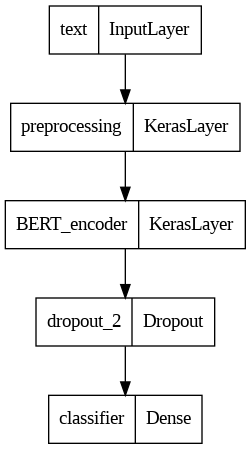

In [ ]:
#전체 모델의 구조
tf.keras.utils.plot_model(classifier_model)

### **TRAINING**





loss, accuracy 저장할 tf 객체

In [ ]:
#이진분류 classification의 loss와 accuracy 저장하는 tf 객체 생성, .numpy()시 각 수치 리턴
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

Optimizer 만드는 코드
- Optimizer 로 Adam과 weight decay 결합한 AdamW 사용

Adam 최적화 알고리즘
-적응적 학습률을 사용하는 최적화 방법
Weight Decay
-과적합을 방지하기 위해 사용하는 기법
AdamW
-Adam과 Weight Decay 둘다 잡고 효율도 늘린 좋은거

In [ ]:
epochs = 1
#train dataset's cardinality .numpy()를 통해 값 return 받음 : 하나하나 다 하겠다는 의미
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
#0.1만큼 warmup을 가지며 optimizer가 데이터에 적응할 수 있도록 해줌
num_warmup_steps = int(0.1*num_train_steps)
#warmup끝나고 목표로 하는 학습 비율
init_lr = 3e-5

optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw') #optimizer adamw


In [ ]:
num_train_steps

6.25

COMPILE = 최종 모델 + loss, accuracy + Optimizer

In [ ]:
#위에서 만든 loss, accuracy, optimizer 사용해 전체 모델 compile
classifier_model.compile(optimizer = optimizer,
                         loss=loss,
                         metrics=metrics)

print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data = val_ds,
                               epochs = epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
63/63 [==============================] - 734s 11s/step - loss: 0.6323 - binary_accuracy: 0.6065 - val_loss: 0.5741 - val_binary_accuracy: 0.6780


### **EVALUATION 평가라는 뜻**

In [ ]:
#지표 테스트
loss, accuracy = classifier_model.evaluate(test_ds)

print(f'Loss : {loss}')
print(f'Accuracy: {accuracy}')

79/79 [==============================] - 220s 3s/step - loss: 0.5579 - binary_accuracy: 0.6864
Loss : 0.5578547716140747
Accuracy: 0.6863999962806702


### **모델 저장/불러오기 코드**

In [ ]:
#모델 저장하기
folder_path = '/content/my_model'
if not os.path.exists(folder_path):
  os.mkdir(folder_path)
else:
  print("folder exists")

model_path = os.path.join(folder_path,'first_model')
classifier_model.save(model_path) #모델 + weight 통째로 저장

#weight_path = os.path.join(folder_path,'first_model_weight')
#classifier_model.save_weights(weight_path) #weight만 저장

In [ ]:
#모델 폴더 압축하기(PC 저장용)
import zipfile

folder_path = '/content/my_model'
zip_path = '/content/my_model.zip'

with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, folder_path)
                zipf.write(file_path, arcname=arcname)



In [ ]:
from tensorflow.keras.models import load_model

#모델 불러오기 - AdamW는 checkpoint를 지원하지 않아 모델을 load하고 다시 컴파일을 할 수 없으니 오류가 난다. compile=False를 지정해주어서 나는 그걸 안할것이라고 명시해주어야 한다.
model = load_model(model_path,compile=False)

#model = Model()
#model.load_weight(weight_path)


### Mei - txt 파일 pos, neg **분류코드**

In [ ]:
from google.colab import files
import io

# 파일 업로드
uploaded = files.upload()

# 업로드된 파일 중 txt 파일을 선택하여 내용을 읽음
for fn in uploaded.keys():
  if fn.endswith('.txt'):
    # 파일 열기
    with io.open(fn, 'r', encoding='utf-8') as file:
      text = file.read()
      break

# 변수 'text'에 저장된 내용 확인
print(text)
text = [text]

#model을 만드는 함수를 지정할 때 입력할 데이터의 이름을 'text'라고 내가 선언해주었다. 형식 : text = ['문자열']
prediction = model.predict(text)

res = 'pos' if prediction[0] >=0.5 else 'neg'

print(prediction[0], res)


Saving 10049_1.txt to 10049_1.txt
I love the frequently misnomered "Masters of Horror" series. Horror fans live in a constant lack of nourishment. Projects like this (and the similar "Greenlight Project" with gave us "Feast" - like it or lump it) are breeding grounds for wonderful thought bubbles in the minds of directors with a horror bent to develop and bring to maturation food for we who love to dine on horror.<br /><br />This one began with a kernel of really-kool-idea and ran ... right off the edge of "where in the world am I going with this?!!!".<br /><br />I don't know how to spoil the spoiled but "SPOILER AHEAD" All of a sudden ... no, there was that light drifting across the night sky earlier ... we have long haired luminescent aliens (huh? ... HUH?) brain drilling males and ... yeah, I get it but ... well ... the worst curse of storytelling - a rousing and promising set up without a rewarding denouement.<br /><br />Cue to storytellers ... your build up has to have a payoff th

In [ ]:
model.layers[2].get_weights()

[array([[ 0.07700857, -0.10239055,  0.01086837, ...,  0.02648737,
          0.0527407 , -0.00988592],
        [-0.00616274, -0.04477132,  0.00677102, ...,  0.04599522,
          0.01768315, -0.04868056],
        [-0.00140175, -0.01835084,  0.02070362, ...,  0.09361945,
          0.05605349, -0.06899551],
        ...,
        [-0.05386386, -0.02979627,  0.07105818, ...,  0.00571503,
          0.01720923, -0.04373585],
        [ 0.04459429, -0.05707806,  0.0028003 , ..., -0.01379211,
          0.0534383 , -0.07411652],
        [ 0.07978432,  0.03066236, -0.02535128, ...,  0.03888792,
          0.04172968, -0.02082611]], dtype=float32),
 array([[-0.00218351, -0.01629448, -0.00568848, ..., -0.0813136 ,
         -0.01804847,  0.0010466 ],
        [-0.01422789, -0.00938616, -0.00020416, ...,  0.02272913,
         -0.02473607, -0.02061963],
        [-0.01346342, -0.00020932,  0.00741089, ...,  0.00475347,
         -0.0020435 ,  0.00613032],
        ...,
        [ 0.02490734, -0.00117839, -0.0